In [1]:
import numpy as np
import pandas as pd
from utils.utils import PROJECT_DATA_DIR
import os
import mxnet as mx
import tarfile
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   Imputer,
                                   QuantileTransformer)
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras import optimizers
from sklearn.metrics import f1_score

C:\Users\gilbe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_xab = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'xab.csv'), 
                       sep='\s+', header=None)
test_xab = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'xab_test_400.csv'), 
                       sep='\s+', header=None)

In [3]:
train_xab.shape

(721548, 1201)

In [4]:
test_xab.shape

(430391, 1201)

In [5]:
ytrain_xab = train_xab[train_xab.columns[-1]]
print(ytrain_xab.unique())
xtrain_xab = train_xab.drop(train_xab.columns[-1], axis=1)
ytest_xab = test_xab[test_xab.columns[-1]]
print(ytest_xab.unique())

xtest_xab = test_xab.drop(test_xab.columns[-1], axis=1)
ytrain_xab = ytrain_xab.map(lambda x: 1 if x in [12, 13, 17, 20] else 0)
ytest_xab = ytest_xab.map(lambda x: 1 if x in [12, 13, 17, 20] else 0)
#print(ytrain_sc.unique())
#ytrain_sc.head()
print(xtrain_xab.shape)

[26 23 21 16 27 -1 24 22 25 15 11 13 10 20 28 18 17 12 14]
[22 23 21 -1 13 15 16 10 26 18 11 24 17 27 25 28 14 20 12]
(721548, 1200)


In [6]:
print(xtrain_xab.shape)
print(xtest_xab.shape)

(721548, 1200)
(430391, 1200)


In [7]:
scaler_xab = QuantileTransformer(copy=False, output_distribution='normal')
xtrain_xab_sc = scaler_xab.fit_transform(xtrain_xab)
xtest_xab_sc = scaler_xab.transform(xtest_xab)

In [8]:
#xtrain_xab.head()

In [9]:
model = Sequential()
#model.add(BatchNormalization(input_dim=1200))
model.add(Dense(units=1200, activation='relu', input_dim=1200), )
model.add(Dropout(0.4))
model.add(Dense(units=500))
model.add(Dropout(0.4))
model.add(Dense(units=75, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))


In [10]:
lr = 0.001
optim = optimizers.Adam(lr=lr,
                        beta_1=0.9,
                        beta_2=0.999,
                        decay=1e-6)
model.compile(loss='binary_crossentropy',
                        optimizer=optim,
                        metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
history = model.fit(xtrain_xab_sc,
                    ytrain_xab,
                    epochs=20,
                    batch_size=2**9, 
                    validation_data=(xtest_xab_sc, ytest_xab))

Train on 721548 samples, validate on 430391 samples
Epoch 1/20
721548/721548 [==============================] - 60s - loss: 0.0792 - acc: 0.9681 - val_loss: 0.0577 - val_acc: 0.9800
Epoch 2/20
721548/721548 [==============================] - 55s - loss: 0.0569 - acc: 0.9805 - val_loss: 0.0471 - val_acc: 0.9833
Epoch 3/20
721548/721548 [==============================] - 55s - loss: 0.0504 - acc: 0.9836 - val_loss: 0.0474 - val_acc: 0.9841
Epoch 4/20
721548/721548 [==============================] - 55s - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0466 - val_acc: 0.9858
Epoch 5/20
721548/721548 [==============================] - 55s - loss: 0.0435 - acc: 0.9864 - val_loss: 0.0423 - val_acc: 0.9863
Epoch 6/20
721548/721548 [==============================] - 56s - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0423 - val_acc: 0.9863
Epoch 7/20
721548/721548 [==============================] - 55s - loss: 0.0379 - acc: 0.9884 - val_loss: 0.0451 - val_acc: 0.9865
Epoch 8/20
721548/721548 [============

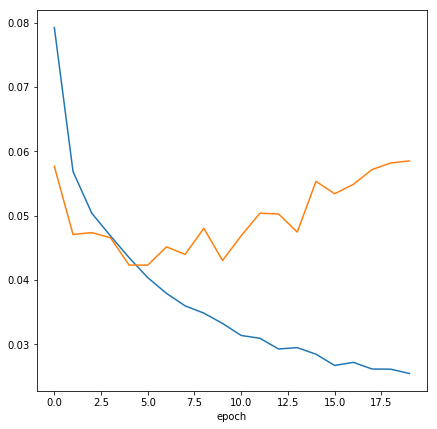

In [12]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
#plt.legeng()
plt.show()